# Aquecimento global no século 21

(INTRODUÇAO - MELHORAR DEPOIS)

O aquecimento global é provavelmente o maior desafio que a humanidade já teve que enfrentar. Sub-produto da busca humana por desenvolvimento, ele ameaça todas as formas de vida presentes no planeta.
Desde o advento da Revolução Industrial em 1760, pesquisadores já desconfiavam que o CO2 emitido pelas cada vez mais numerosas máquinas a carvão iria aquecer o planeta em alguns séculos (FONTE). Agora, um estudo realizado em 2020 revela que até um terço de toda fauna e flora global podem ser extintas até 2070 (FONTE).

Tendo isso em mente, neste notebook iremos tentar analisar como algumas das potências do mundo estão tentando evitar, ou pelo menos desacelerar, o aquecimento global. Veremos também as alternativas possíveis para os combustíveis fósseis, principais contribuintes para a emissão anual de gases de efeito estufa, (E MAIS OUTRAS COISAS).

TODO:

**Primeira seção**
* Passar a parte do CO2 do final para o início; (D)
* Introduzir um estudo das temperaturas, incluindo fatores solares e comparando com a temperatura na era do gelo; (I)
* Correlacionar com a parte do CO2; (D)
* Correlacionar com o aumento da população e o consequente aumento da demanda energética.

**Análise da dependência fóssil**
* Correlacionar o crescimento econômico dos países em desenvolvimento com a necessidade de emitir CO2

**Análise das fontes renováveis**
- Fazer o estudo sobre as energias renováveis;
- Analisar a energia nuclear da Alemanha, França e Japão;

In [59]:
# imports padrões
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as pld
import pandas as pd
import seaborn as sns
import math

## Introdução ao estudo

Explicaremos sobre as bases de dados utilizadas, e demonstramos como iremos utilizá-las.

Neste projeto, utilizaremos X bases de dados:

#### World Energy Consumption

Essa será o principal dataset usado. Foi obtido a partir do [Kaggle](https://www.kaggle.com/datasets/pralabhpoudel/world-energy-consumption), contudo ele é mantido por [Our World in Data](https://ourworldindata.org/energy). Nele, podemos obter dados de cada país sobre:

* Consumo, produção e importação energética;
* População;
* GDP.

Cada uma das categorias energéticas está disponibilizada de 4 formas diferentes: per capita, porcentagem, mudança anual e em relação a economia. Também podemos filtrar quais fontes energéticas queremos incluir na análise, como eólica, solar, ou carvão, por exemplo.

Mais informações em: https://github.com/owid/energy-data

### CO2 Emissions

Esse dataset também foi obtido do [Our World in Data](https://ourworldindata.org/energy). Dados inclusos, por país:

* Produção de CO2, e de onde ele veio (carvão, petróleo, gás natural ...);
* Produção de outros gases efeito estufa, como metano e óxido nitroso;
* População;
* GDP.

Assim como o último dataset, este também inclui os dados das mesmas 4 formas.

Mais informações em: https://github.com/owid/co2-data

### Introdução à metodologia

Vamos primeiro demonstrar como usaremos os dados obtidos.

Antes de tudo, precisamos definir que países vão ser analisados. Não queremos analisar todos, já que a visualização dos dados seria comprometida.

Observe que não colocaremos todos os países considerados como potências econômicas. Contudo, os países da lista a seguir já nos darão uma boa ideia do cenário atual.

In [60]:
potencias = ["United States", "United Kingdom", "France", "Germany", "China", "India", "Brazil", "Japan"]

Perceba que também colocamos o Brasil na lista, para nos compararmos com os outros países.

O resto do notebook se baseará nesta lista; Caso queira ver algum conjunto de países diferente basta mudá-la e rodar o o notebook de novo. As células que precisarem ter algo modificado para funcionarem com essa lista alterada terão aviso prévio.

Agora, vamos mostrar um exemplo de como faremos um gráfico com os dados do dataset que temos.

Como exemplo, vamos ver a população de cada um dos países da lista no período 1990-1999.

In [61]:
# Primeiro, vamos mostrar como iterar sobre as listas e colunas

data = pd.read_csv("./data./World Energy Consumption.csv")
for index,row in data.iterrows():
    if row.country in potencias and row.year == 1999:
        print(row.population)

172319008.0
1281515008.0
58704000.0
81390000.0
1038057984.0
127326000.0
58716000.0
278548000.0


Caso mude a lista de potências, verifique se o número de output corresponde ao número de países listados, para verificar que digitou os nomes dos países corretamente.

Agora que conseguimos esses dados, vamos montar o gráfico que cobre o período de 1990-1999.

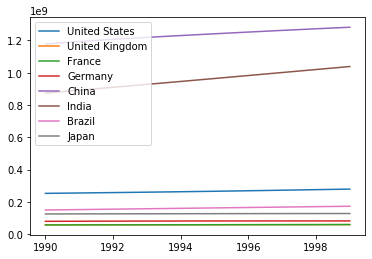

In [62]:
# Criando o dicionário que vai segurar os dados de cada país
dict_resultado = {}

# Primeiro vamos popular o dicionário com as keys dos países desejados
for country in potencias:
    dict_resultado[country] = []

# Colocando os dados no dicionário
for index, row in data.iterrows():
    if row.country in potencias and row.year in range(1990, 2000): # Explicado em baixo
        dict_resultado[row.country].append(row.population)

# Fazendo o gráfico com o dicionário

for country, population in dict_resultado.items():
    plt.plot(range(1990, 2000), population, label=country)
    plt.legend(loc="upper left")

OBS: Quando vamos botar os dados nas listas, não nos preocupamos em organizá-los cronologicamente. A princípio, isso seria uma prática ruim, visto que seria muito fácil ficarmos com dados na seguinte estrutura:

`[(dados de 2000), (dados de 2002), (dados de 2005), (dados de 2001), (dados de 2003)]`

Contudo, os csvs utilizados foram organizados previamente de forma cronológica, então não precisamos nos preocupar com isso, já que o loop vê as linhas de cima para baixo, da mesma forma que elas foram organizadas. Dessa forma, podemos usar a técnica com range(), que nos permite iterar sobre o csv de forma mais rápida.

Nossa análise de dados, portanto, sempre será feita nesse mesmo molde:

1. Ler o csv do dataset, e armazenar os dados;
2. Criar um dicionário, com listas para guardar as informações de cada país;
3. Iterar sobre os dados a procura de certa informação;
4. Guardar informações no dicionário;
5. Usar Matplotlib para fazer um gráfico desse dicionário.

Agora que demonstramos o worflow geral que será feito para analisar os dados, estamos prontos para começar o estudo.

## Qual a importância do aquecimento global?

Cientistas afirmam que o aumento da concentração de gases estufa na atmosfera está diretamente ligado com todas as mudanças climáticas que estamos vivenciando nos últimos anos. Nessa seção, analisaremos o quão grave esses efeitos realmente são, e se eles têm alguma correlação com a emissão de gases como CO2 na atmosfera ou não.

### O quanto a temperatura realmente aumentou?

Supostamente, as temperaturas devem ter aumentado nas últimas décadas para podermos começar a considerar que o aquecimento global é real. Vamos analisar a mudança da temperatura média entre a terra e o oceano, no período de 1850 até 2015.

In [63]:
temperature_data = pd.read_csv("./data/GlobalTemperatures.csv")

dict_land_temperature_years = {year:[] for year in range(1850, 2016)}

for index, row in temperature_data.iterrows():
    ano = int(row["dt"][:4:])
    if ano >= 1850:
        dict_land_temperature_years[ano].append(row.LandAndOceanAverageTemperature)

for ano, temperaturas in dict_land_temperature_years.items():
    dict_land_temperature_years[ano] = np.average(temperaturas)

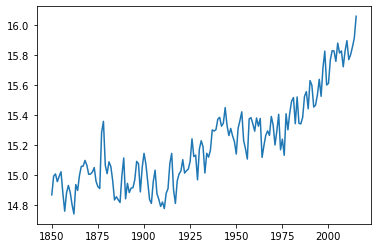

In [64]:
# Graphing
# Plotar a linha reta depois!!!
plt.plot(list(dict_land_temperature_years.keys()), list(dict_land_temperature_years.values()));

A média da temperatura da terra e dos oceanos aumentou em por volta de 1 grau. Isso pode não parecer muito, mas temos que ter em mente 3 fatores:

* Os ecosistemas terrestres são extremamente sensíveis à mudanças de temperatura;
* O gráfico mostra que a temperatura só tende a continuar a subir;
* Se continuarmos assim, o aquecimento global se tornará auto suficiente.

O último ponto é de extrema importância. Quanto mais quente a Terra fica, mais geleiras derreterão. Essas geleiras são importantes, pois devido à serem brancas, elas refletem grande parte da radiação solar de volta ao espaço. Sem elas, aprisionaremos cada vez mais o calor do Sol. Além disso, quanto maior a temperatura dos oceanos, mais eles evaporarão. O vapor d'água é um dos gases estufa mais eficientes em prender calor. Portanto, conforme a Terra fica mais quente, mais esses 2 fenômenos ocorrem, que ajudam a esquentar ainda mais a Terra.

O derretimento das geleiras também traz outra consequência grave do aquecimento global: o aumento do nível do mar. Mas, se só temos geleiras nos polos da Terra, como seu derretimento pode aumentar de forma perceptível o nível do mar?

### O quanto o nível dos mares aumentou?

O oceano é gigantesco: cobre 70% da superfície terrestre. É difícil acreditar que algumas geleiras nos polos contenham tanta água ao ponto de, ao derreterem, não só aumentarem de forma perceptível o nível dos mares, como também aumentarem em um nível que ameaça a nossa sobrevivência. Com o dataset obtido do Kaggle, vamos ver o quanto foi o aumento de 1880 até 2014.

In [65]:
sea_level_data = pd.read_csv("./data/epa-sea-level.csv")

dict_sea_level = {year:[] for year in range(1880, 2015)}

for index, row in sea_level_data.iterrows():
    sea_level_year = int(row.Year[:4])
    dict_sea_level[sea_level_year] = row["CSIRO Adjusted Sea Level"]

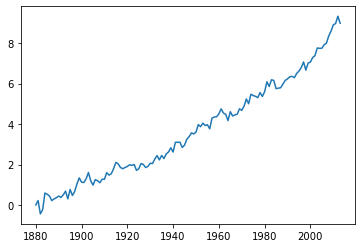

In [66]:
plt.plot(list(dict_sea_level.keys()), list(dict_sea_level.values()));
# Plotar uma linha reta depois pra ficar legal

De novo vemos uma clara tendência. O nível dos mares subiu aproximadamente 9 XX desde 1880, e o aumento está acelerando.

Se continuarmos assim, em um futuro próximo cidades costeiras serão inundadas, e a produção de alimentos será comprometida conforme rios de água doce começam a fluir ao contrário, e se tornam de água salgada.

Contudo, como podemos ter certeza de que esses 2 aumentos não são apenas uma coincidência, parte de um ciclo natural da Terra?

### Como a mudança climática se relaciona com o CO2?

Vimos que a temperatura e o nível dos mares aumentaram consistentemente nas últimas décadas, mas isso poderia se dar a vários fatores. Por exemplo, muitos afirmam que isso é simplesmente uma "fase cíclica" pela qual a Terra passa, como a Era do Gelo. Nesta seção, vamos correlacionar os dois últimos gráficos com o aumento da concentração de CO2 na atmosfera.

In [67]:
co2_concentration_data = pd.read_csv("./data/co2-concentration.csv")

dict_co2_concentration = {year:[] for year in range(1958, 2018)}


for index, row in co2_concentration_data.iterrows():
    co2_concentration_ano = int(row.Year)
    if row["Carbon Dioxide (ppm)"] > 0: # Vendo se tem dados
        dict_co2_concentration[co2_concentration_ano].append(row["Carbon Dioxide (ppm)"])
    else: # Se não tem, adicionamos a média
        if len(dict_co2_concentration[co2_concentration_ano]) > 0:
            dict_co2_concentration[co2_concentration_ano].append(np.average(dict_co2_concentration[co2_concentration_ano]))
            
for ano, concentracao in dict_co2_concentration.items():
    dict_co2_concentration[ano] = np.average(concentracao)

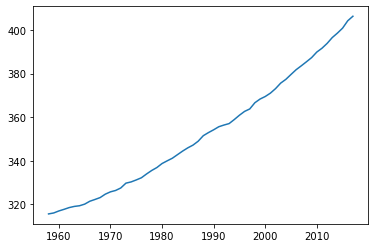

In [68]:
plt.plot(list(dict_co2_concentration.keys()), list(dict_co2_concentration.values()));

Podemos claramente ver que a concentração de CO2 na atmosfera está aumentando, assim como os últimos 2 indicativos.

Mas, se a única coisa que devemos fazer para parar esse aquecimento é cortar o uso de combustíveis fósseis, por quê ainda não o fizemos? Afinal, já temos as tecnologias de energias alternativas.

### Por quê não simplesmente ... paramos de poluir?

Atualmente, temos tecnologias que conseguem tirar energia de fontes limpas como solar, eólica e hidrelétrica. Se elas estão disponíveis, o que estamos esperando para começar a transição de fontes fósseis para renováveis?

Primeiro, vamos analisar a razão para todo esse CO2 expelido: sustentar cada vez mais humanos. Praticamente tudo com que interagimos no nosso cotidiano requer energia para funcionar ou ser feito. Mas, para sermos mais objetivos, vamos somente analisar o único aspecto do qual não podemos nos livrar, parar de usar: alimentação. Vejamos quanto CO2 alguns dos nossos alimentos custam, quando incluímos todo o processo para fabricá-los, incluindo o uso de terra, alimentação animal, transporte e embalagem.

In [69]:
food_data = pd.read_csv("./data/Food_Production.csv")
alimentos = {}

for index, row in food_data.iterrows():
    alimentos[row["Food product"]] = row["Total_emissions"]

In [70]:
# Vamos fazer um dataframe dos nossos dados, para podermos organizá-los
comida_series = pd.Series(alimentos.keys())
emissao_series = pd.Series(alimentos.values())

comida_e_emissoes = {
    "Alimento":comida_series,
    "Emissão":emissao_series
}

alimentos_df = pd.DataFrame(comida_e_emissoes)
sorted_alimentos_df = alimentos_df.sort_values("Emissão", ascending=False, axis=0)

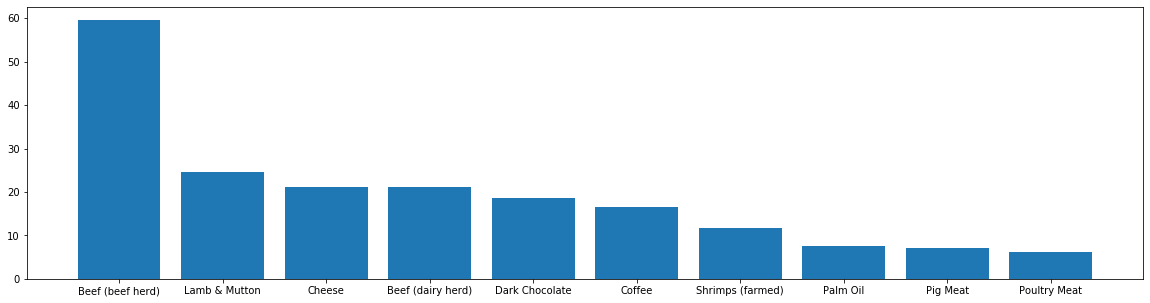

In [71]:
# Gráfico, somente dos X mais poluentes
quantidade_de_alimentos = 10
plt.subplots(figsize = (quantidade_de_alimentos * 2, 5))
plt.bar(x = sorted_alimentos_df["Alimento"][:quantidade_de_alimentos], height = sorted_alimentos_df["Emissão"][:quantidade_de_alimentos]);

Conseguimos ver que, para alimentar a população, é necessário emitir bastante CO2, principalmente para carnes de forma geral. Esse é um dos custos dos quais não podemos nos livrar. Por exemplo, podemos substituir motores à combustão por elétricos, ou substituir plásticos por papel, mas sempre teremos que nos alimentar. A única forma de diminuir a emissão de CO2 nesses processos seria se a população decidisse parar de comer alimentos com alto custo de emissões, como carnes, o que não deve acontecer tão cedo.

## Afinal, quem são os culpados?

Parece que a melhor forma de resolver o aquecimento global é reprimir os países que atualmente mais dependem de fontes fósseis, e forçá-los a adotarem fontes mais limpas. Contudo, para sabermos quais países são esses, precisamos analisar a matriz energética de cada um deles.

Então, vamos começar analisando o consumo bruto de cada um.

### Consumo, bruto

Primeiro, vamos analisar o consumo bruto de eletricidade produzida por combustíveis fósseis, em terawatt-hora.

In [72]:
# Criando o dicionário
dict_co2_depend = {}
for pais in potencias:
    dict_co2_depend[pais] = []


# Populando o dicionário
ano_inicial = 1980
ano_final = 2020
for index,row in data.iterrows():
    if row.country in potencias:
        if row.year in range(ano_inicial, ano_final): # OBS: Isso é seguro de se fazer nesse csv, pois os dados estão organizados cronologicamente. (Explicado na seção Tratamento de Dados)
            if type(row.fossil_electricity == int) or type(row.fossil_electricity == float):
                dict_co2_depend[row.country].append(row.fossil_electricity)
            else: # Se não tem dados sobre esse ano, então colocamos a média do país até então
                dict_co2_depend[row.country].append(np.average(dict_co2_depend[row.country]))
        

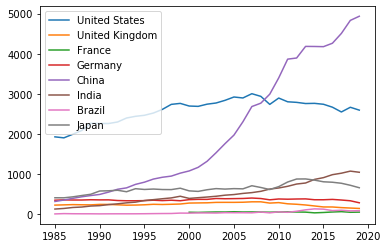

In [73]:
# Agora que temos os dados, vamos fazer um gráfico com eles
for pais, uso in dict_co2_depend.items():
    plt.plot(range(ano_inicial, ano_final), uso, label = pais)
    plt.legend(loc="upper left")

Com o gráfico acima, podemos ver que, dos países selecionados, a China e os EUA são de longe os que mais consomem combustíveis fósseis. Podemos ver também que somente a Índia, e principalmente a China, tiveram um aumento considerável no consumo nos últimos anos. 

Portanto, o gráfico acima deixa bem claro quais países são responsáveis por toda essa confusão. Contudo, antes de apontarmos dedos, vamos dar uma chance a eles e fazer mais uma análise: **o quanto cada um deles consome de energia renovável.**

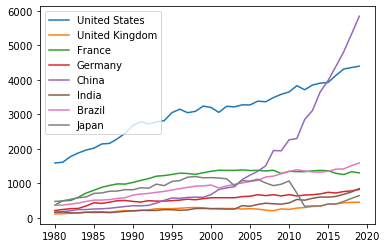

In [74]:
renew_energy = {}
for pais in potencias:
    renew_energy[pais] = []


for index,row in data.iterrows():
    if row.country in potencias:
        if row.year in range(ano_inicial, ano_final):
            if type(row.low_carbon_consumption == int) or type(row.low_carbon_consumption == float):
                renew_energy[row.country].append(row.low_carbon_consumption)
            else: # Se não tem dados sobre esse ano, então colocamos a média do país até então
                renew_energy[row.country].append(np.average(renew_energy[row.country]))


for pais, uso in renew_energy.items():
    plt.plot(range(ano_inicial, ano_final), uso, label = pais)
    plt.legend(loc="upper left")

Então, aparentemente, a China e os Estados Unidos não são só os que mais consomem energia fóssil, mas renovável também. Isso nos leva à conclusão de que eles simplesmente usam mais energia do que o resto do mundo.

Agora demonstramos um fator importante neste estudo: ao analisar os dados, sempre devemos levar em conta a população do país. Assim, um país que precisa gerar energia suficiente para sustentar 1 bilhão de pessoas é comparado de forma justa com outro com apenas 50 milhões.

Tendo isso em mente, vamos analisar os dois últimos gráficos de uma forma mais correta.

### Consumo, per capita

Vamos rapidamente refazer os dois últimos gráficos, mas agora com os dados per capita.

OBS: Não vamos levar em conta o HDI do país por enquanto, tendo em vista que estamos analisando somente a correlação da dependência de CO2 e o quanto o país produz, de forma bruta. A análise com HDI será feita mais tarde.

In [75]:
# Primeiro, o da dependência de fósseis
dict_co2_per_capita = {}
for pais in potencias:
    dict_co2_per_capita[pais] = []

ano_inicial = 1980
ano_final = 2020
for index,row in data.iterrows():
    if row.country in potencias:
        if row.year in range(ano_inicial, ano_final):
            if type(row.fossil_energy_per_capita == int) or type(row.fossil_energy_per_capita == float):
                dict_co2_per_capita[row.country].append(row.fossil_energy_per_capita)
            else:
                dict_co2_per_capita[row.country].append(np.average(dict_co2_per_capita[row.country]))


# Agora, o das energias renováveis
renew_energy_per_capita = {}
for pais in potencias:
    renew_energy_per_capita[pais] = []

for index,row in data.iterrows():
    if row.country in potencias:
        if row.year in range(ano_inicial, ano_final):
            if type(row.renewables_elec_per_capita == int) or type(row.renewables_elec_per_capita == float):
                renew_energy_per_capita[row.country].append(row.renewables_elec_per_capita)
            else:
                renew_energy_per_capita[row.country].append(np.average(renew_energy_per_capita[row.country]))

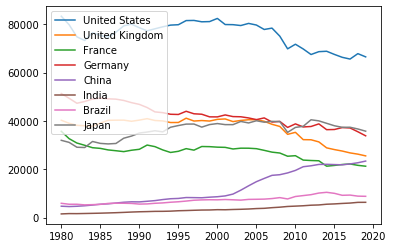

In [76]:
# Gráfico das fósseis

for pais, uso in dict_co2_per_capita.items():
    plt.plot(range(ano_inicial, ano_final), uso, label = pais)
    plt.legend(loc="upper left")

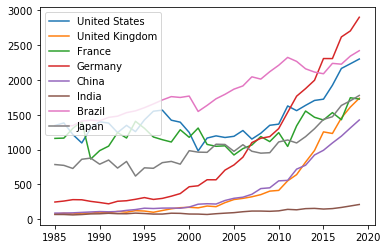

In [77]:
# Gráfico das renováveis

for pais, uso in renew_energy_per_capita.items():
    plt.plot(range(ano_inicial, ano_final), uso, label = pais)
    plt.legend(loc="upper left")

No gráfico de dependência fóssil, os países desenvolvidos ficam em evidência, principalmente os Estados Unidos, visto que o alto padrão de vida dos seus habitantes resulta em um maior uso de energia de forma geral.

Contudo, os países desenvolvidos também lideram o uso de energias renováveis, e são os que mais investiram recentemente no setor. A Alemanha por exemplo, tem uma curva quase exponencial. Vale notar a curva da China, que também vem demonstrando esforços para se modernizar. Dos países listados, somente a Índia aparenta ter um consumo baixo de energia limpa.

Com esses dois gráficos podemos ter uma visão mais correta da situação, mas podemos fazer melhor. O aquecimento global é um problema urgente, e não devemos perder tempo culpando uma nação pelo o quê ela fez ou não há mais de 10 anos, já que não podemos mais evitar que todo o combustível fóssil seja utilizado. O que realmente nos interessa é analisar os últimos anos, que nos mostram se um país está tomando medidas para reduzir suas emissões ou não.

Portanto, devemos fazer essa análise uma última vez, levando em conta somente anos recentes.

Para finalizar nossa análise, vamos agora refazer os dois gráficos umax última vez.

### Consumo, em porcentagem

Finalmente, vamos comparar a porcentagem de energia suja e limpa consumida por cada um dos paises listados. Como vamos comparar duas categorias para cada país, um pie chart será a forma mais adequada de mostrar os dados. Nele, vamos considerar as médias dos últimos 3 anos de cada país.

OBS: Se tiver mudado a lista `potencias`, certifique-se de mudar os parâmetros row e columns na segunda célula.

In [78]:
ultimos_x_anos = 4 # Lembrar que esse número é x-1. Ex: Se colocarmos 4, veremos a média dos últimos 3 anos.


# Dependência de fósseis
dict_co2_percent = {}
for pais in potencias:
    dict_co2_percent[pais] = []

ano_inicial = 1980
ano_final = 2020
for index,row in data.iterrows():
    if row.country in potencias:
        if row.year in range(ano_inicial, ano_final):
            if type(row.fossil_share_energy == int) or type(row.fossil_share_energy == float):
                dict_co2_percent[row.country].append(row.fossil_share_energy)
            else:
                dict_co2_percent[row.country].append(np.average(dict_co2_percent[row.country]))


# Dependência de renováveis
renew_energy_percent = {}
for pais in potencias:
    renew_energy_percent[pais] = []

for index,row in data.iterrows():
    if row.country in potencias:
        if row.year in range(ano_inicial, ano_final):
            if type(row.low_carbon_share_energy == int) or type(row.low_carbon_share_energy == float):
                renew_energy_percent[row.country].append(row.low_carbon_share_energy)
            else:
                renew_energy_percent[row.country].append(np.average(renew_energy_percent[row.country]))

# Demanda total de cada país
dict_energy_demand = {}
for pais in potencias:
    dict_energy_demand[pais] = sum(dict_co2_depend[pais][:-ultimos_x_anos:-1]) + sum(renew_energy[pais][:-ultimos_x_anos:-1])


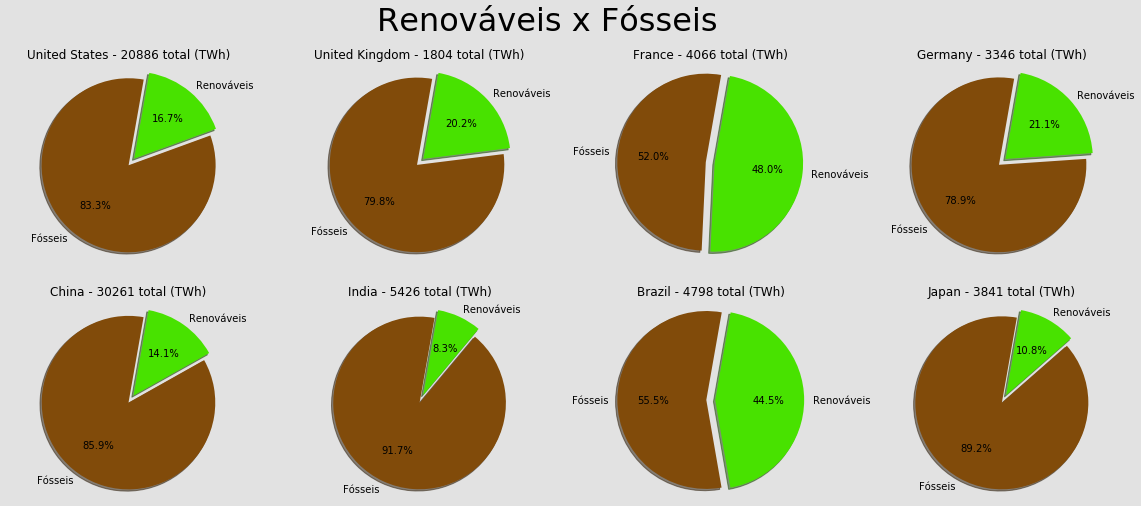

In [79]:
# Vamos fazer os 8 pie charts.

rows = 2 # Quantas linhas de gráficos
columns = 4 # Quantas colunas
h = 8 # Altura da imagem com os gráficos
l = 20 # Largura da imagem

figure, axis= plt.subplots(rows, columns, figsize=(l, h))
figure.suptitle("Renováveis x Fósseis", fontsize = 32)
figure.patch.set_facecolor("#E2E2E2")
labels = ["Fósseis", "Renováveis"]
colors = ["#814B0A", "#48E200"]
explode = (0.1, 0) # Isso faz com que a primeira label na lista acima seja a que "saia" do gráfico

medias_renovaveis = {}
medias_fosseis = {}
# Populando os dicionários com as médias correspondentes dos ultimos x-1 anos
for pais in potencias:
    medias_fosseis[pais] = np.average(dict_co2_percent[pais][:-ultimos_x_anos:-1])
    medias_renovaveis[pais] = np.average(renew_energy_percent[pais][:-ultimos_x_anos:-1])

# Fazendo o gráfico para cada um dos países
current_row = 0
current_column = 0
for pais in potencias:
    emissions_data = [medias_fosseis[pais], medias_renovaveis[pais]]
    axis[current_row, current_column].pie(emissions_data, 
                                          labels=labels, 
                                          explode=explode, 
                                          autopct='%1.1f%%', 
                                          shadow=True,
                                          colors=colors,
                                          startangle=80)
    axis[current_row, current_column].set_title(f"{pais} - {int(dict_energy_demand[pais])} total (TWh)")
    axis[current_row, current_column].axis("equal")
    current_column += 1
    if current_column > 3:
        current_row += 1
        current_column = 0

Com os gráficos acima, podemos ter uma visão mais completa da matriz energética de cada um dos 8 países. Aqui vemos que, em média, os países desenvolvidos e em desenvolvimento tem na verdade aproximadamente a mesma fatia de consumo de energias fósseis e renováveis, com a exceção do Brasil e França, que se destacam com mais ou menos 45% de energia limpa.

Podemos concluir que quase todos os países ainda têm um longo caminho para se tornarem sustentáveis. Dos 8 países analisados, somente a França e o Brasil se destacam no uso de fontes renováveis. Contudo, é importante ressaltar a quantidade de energia que a China e os Estados Unidos consomem: eles consomem mais energia do que todos os outros países juntos. Portanto, apesar de todos terem o dever de reduzir suas emissões, esses 2 países têm a maior responsabilidade.

Na última seção, concluímos que é injusto analisar de forma bruta os dados de consumo de combustíveis fósseis, visto que países mais populosos naturalmente irão ter um consumo maior de energia como um todo, e isso vai inevitavelmente incluir energia de fontes não renováveis.

Contudo, pode-se argumentar que há um certo nível de importância realizar a análise desta forma. Afinal, a atmosfera não se importa com os números per capita, mas sim com cada tonelada de gases estufa emitida. Dessa forma, mesmo que a Índia, por exemplo, tenha um baixo nível de emissão per capita, o fato dela depender tanto de fontes não limpas ainda é relevante.

Vamos portanto, ver quem mais poluiu no total.

### Quem foi o maior poluidor?

Nesta seção, iremos analisar a quantidade total de CO2 lançado na atmosfera de 1950 até 2020.

In [80]:
# Para isso, vamos precisar de outro csv que contem a emissão de co2 de cada país
greenhouse_data = pd.read_csv("./data/co2-emissions.csv")


# Dependência de fósseis
dict_greenhouse_total = {}
for pais in potencias:
    dict_greenhouse_total[pais] = []

ano_inicial = 1950
ano_final = 2020
for index,row in greenhouse_data.iterrows():
    if row.country in potencias:
        if row.year in range(ano_inicial, ano_final):
            if type(row.co2 == int) or type(row.co2 == float):
                dict_greenhouse_total[row.country].append(row.co2)
            else:
                dict_greenhouse_total[row.country].append(np.average(dict_greenhouse_total[row.country]))

# Agora, vamos ver o total de cada lista
for pais, emissao in dict_greenhouse_total.items():
    dict_greenhouse_total[pais] = sum(emissao)

In [81]:
# Criando um DataFrame, para podermos organizar o gráfico
paises = pd.Series(dict_greenhouse_total.keys())
emissoes = pd.Series(dict_greenhouse_total.values())
paises_e_emisoes = {
    "Paises":paises,
    "Emissoes":emissoes
}
total_greenhouse_df = pd.DataFrame(paises_e_emisoes)

# Agora que temos o DataFrame, é fácil organizar ele
sorted_total_greenhouse_df = total_greenhouse_df.sort_values("Emissoes", ascending=False, axis=0)
sorted_total_greenhouse_df

,Paises,Emissoes
0,United States,322565.855
4,China,223104.183
3,Germany,63311.292
7,Japan,60579.943
5,India,50034.486
1,United Kingdom,39172.982
2,France,26770.143
6,Brazil,15535.672


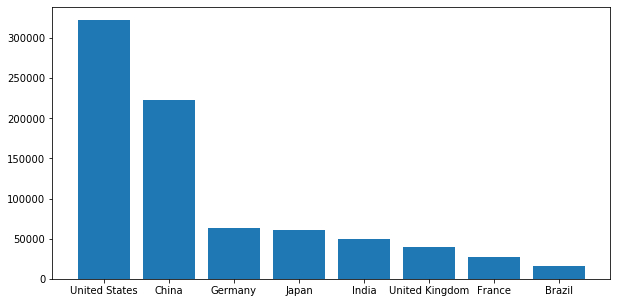

In [82]:
# Fazendo o gráfico
plt.subplots(figsize=(10, 5))
plt.bar(x=sorted_total_greenhouse_df.Paises, height=sorted_total_greenhouse_df.Emissoes);

Os Estados Unidos e China são de longe os que mais emitiram CO2 neste período.

Contudo, é importante ressaltar que o período que escolhemos para fazer nossa análise (1950-2019) favorece os países europeus, que durante o início da Revolução Industrial fizeram amplo uso de combustíveis fósseis, e atualmente têm recursos para investir em tecnologias mais limpas, ou comprar produtos de países em desenvolvimento, que por sua vez são os que se destacam nessas análises.

Podemos concluir então que todos os países, em desenvolvimento ou desenvolvidos, fizeram ou fazem amplo uso de fontes não renováveis para alimentar sua economia. De forma geral, a diferença entre os dois grupos é que enquanto o primeiro está emitindo agora, o segundo já emitiu no passado.

De qualquer forma, não devemos nos preocupar com o passado: devemos nos esforçar para que cada vez mais países consigam adotar as fontes limpas de energia, deixando-as mais acessíveis a todos. Na próxima seção, vamos analisar esse progresso.

## Adoção das fontes renováveis

Agora que vimos um resumo das matrizes energéticas dos países, vamos focar na parte das energias limpas.

Na última seção, discutimos como países desenvolvidos em geral têm mais acesso às tecnologias renováveis. Vamos verificar essa declaração, relacionando o GDP de um país com a porcentagem de sua matriz energética que é renovável.

In [83]:
gdp_data = pd.read_csv("./data/country-gdp.csv")


dict_pib_e_energia = {}



ano = 2016
for index, row in gdp_data.iterrows():
    if index >= 2308:
        if row.Year == ano:
            dict_pib_e_energia[row["Country Name"]] = [row.Value]

for index,row in data.iterrows():
    if row.year == ano:
        if  row.country in dict_pib_e_energia:
            if not math.isnan(row.low_carbon_share_energy):
                dict_pib_e_energia[row.country].append(row.low_carbon_share_energy)
            else: # Se a informação não é válida, não vamos precisar desse país
                del dict_pib_e_energia[row.country]


In [84]:
dict_pib_e_energia["Andorra"]

[2858517699.11504]

In [85]:
gdps = []
porcentagens = []
paises = []



for pais , valores in dict_pib_e_energia.items():
    if len(valores) == 2:
        gdps.append(valores[0])
        porcentagens.append(valores[1])
        paises.append(pais)




pais = pd.Series(paises)
gdp = pd.Series(gdps)
energia = pd.Series(porcentagens)

gdp_energia = {
    "País" : pais,
    "GDP" : gdp,
    "Porcentagem limpa" : energia
}

gdp_energia_df = pd.DataFrame(gdp_energia)
gdp_energia_df

,País,GDP,Porcentagem limpa
0,Algeria,1.590491e+11,0.137
1,Argentina,5.454761e+11,14.066
2,Australia,1.204616e+12,7.207
3,Austria,3.908000e+11,33.768
4,Azerbaijan,3.784772e+10,3.125
...,...,...,...
64,United Arab Emirates,3.487433e+11,0.067
65,United Kingdom,2.647899e+12,18.010
66,United States,1.862448e+13,16.164
67,Uzbekistan,6.722034e+10,3.724


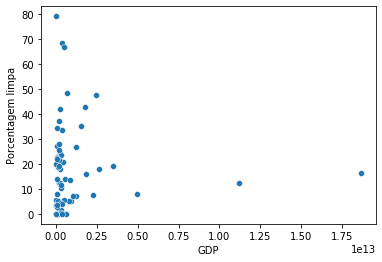

In [86]:
sns.scatterplot(data=gdp_energia_df, x="GDP", y="Porcentagem limpa");

Podemos ver agora que o GDP de um país não é uma boa maneira de fazer essa análise, pois países como os EUA e a China possuem um GDP tão alto que acabam distorcendo a escala. Sem contar que o GDP não é o melhor indicador do desenvolvimento do país. Esse seria o HDI. Vamo então refazer o gráfico acima, mas agora com esse novo indicador:

In [87]:
hdi_data = pd.read_csv("./data/human-development-index.csv")


dict_hdi_e_energia = {}



ano = 2016
for index, row in hdi_data.iterrows():
    if row.Year == ano:
        dict_hdi_e_energia[row["Entity"]] = [row["Human Development Index (UNDP)"]]

for index,row in data.iterrows():
    if row.year == ano:
        if  row.country in dict_hdi_e_energia:
            if not math.isnan(row.low_carbon_share_energy):
                dict_hdi_e_energia[row.country].append(row.low_carbon_share_energy)
            else: # Se a informação não é válida, não vamos precisar desse país
                del dict_hdi_e_energia[row.country]

hdis = []
porcentagens = []
paises = []

for pais , valores in dict_hdi_e_energia.items():
    if len(valores) == 2:
        hdis.append(valores[0])
        porcentagens.append(valores[1])
        paises.append(pais)

pais = pd.Series(paises)
hdi = pd.Series(hdis)
energia = pd.Series(porcentagens)

hdi_energia = {
    "País" : pais,
    "HDI" : hdi,
    "Porcentagem limpa" : energia
}

hdi_energia_df = pd.DataFrame(hdi_energia)

In [88]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(hdi_energia_df)

                    País    HDI  Porcentagem limpa
0                Algeria  0.753              0.137
1              Argentina  0.822             14.066
2              Australia  0.938              7.207
3                Austria  0.906             33.768
4             Azerbaijan  0.757              3.125
5             Bangladesh  0.597              0.748
6                Belarus  0.805              0.315
7                Belgium  0.915             20.639
8                 Brazil  0.758             42.672
9               Bulgaria  0.810             27.344
10                Canada  0.922             35.084
11                 Chile  0.842             18.129
12                 China  0.748             12.454
13              Colombia  0.747             24.545
14               Croatia  0.828             22.580
15                Cyprus  0.867              3.375
16               Czechia  0.885             18.314
17               Denmark  0.928             23.695
18               Ecuador  0.749

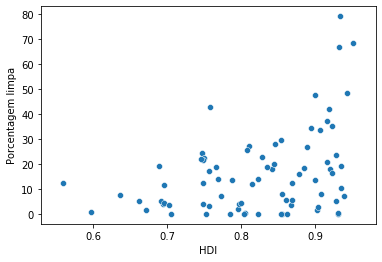

In [89]:
sns.scatterplot(data=hdi_energia_df, x="HDI", y="Porcentagem limpa");

Com o gráfico acima, podemos ver que, na realidade, o HDI do país só indica se ele tem alguma chance de ter uma alta porcentagem de energia limpa, mas não o garante.

Contudo, HDI e GDP devem estar interconectados. Teoricamente, quanto mais dinheiro um país produz, melhor a qualidade de vida dos seus habitantes. Mas dessa vez, não vamos analisar o PIB do país, mas sim o PCI, que leva em conta a população também, visto que se analisássemos o PIB antes, com certeza algo parecido com o primeiro gráfico iria ocorrer.

In [94]:
ano = 2016

dict_pic_hdi_e_energia = {}



ano = 2016
for index, row in hdi_data.iterrows():
    if row.Year == ano:
        dict_pic_hdi_e_energia[row["Entity"]] = [row["Human Development Index (UNDP)"]]

for index,row in data.iterrows():
    if row.year == ano:
        if  row.country in dict_pic_hdi_e_energia:
            if not math.isnan(row.low_carbon_share_energy):
                dict_pic_hdi_e_energia[row.country].append(row.low_carbon_share_energy)
            else: # Se a informação não é válida, não vamos precisar desse país
                del dict_pic_hdi_e_energia[row.country]

for index, row in data.iterrows():
    if row.year == ano:
        if row.country in dict_pic_hdi_e_energia:
            if not math.isnan(row.gdp) and not math.isnan(row.population):
                dict_pic_hdi_e_energia[row.country].append(row.gdp/row.population)
                dict_pic_hdi_e_energia[row.country].append(row.gdp)
                dict_pic_hdi_e_energia[row.country].append(row.population)
            else:
                del dict_pic_hdi_e_energia[row.country]

hdis = []
pics = []
porcentagens = []
paises = []
gdps = []
populacoes = []

for pais , valores in dict_pic_hdi_e_energia.items():
    if len(valores) == 5:
        hdis.append(valores[0])
        porcentagens.append(valores[1])
        pics.append(valores[2])
        gdps.append(valores[3])
        populacoes.append(valores[4])
        paises.append(pais)

pais = pd.Series(paises)
hdi = pd.Series(hdis)
energia = pd.Series(porcentagens)
pic = pd.Series(pics)
gdp = pd.Series(gdps)
populacao = pd.Series(populacoes)

hdi_e_pic_energia = {
    "País" : pais,
    "HDI" : hdi,
    "Populacao" : populacao,
    "GDP" : gdp,
    "PIC" : pic,
    "Porcentagem limpa" : energia
}

hdi_e_pic_energia_df = pd.DataFrame(hdi_e_pic_energia)

In [95]:
hdi_e_pic_energia_df.head()

,País,HDI,Populacao,GDP,PIC,Porcentagem limpa
0,Algeria,0.753,40551000.0,5.340000e+11,13168.602501,0.137
1,Argentina,0.822,43508000.0,8.200000e+11,18847.108578,14.066
2,Australia,0.938,24263000.0,1.070000e+12,44100.070066,7.207
3,Austria,0.906,8747000.0,3.950000e+11,45158.340002,33.768
4,Azerbaijan,0.757,9736000.0,1.450000e+11,14893.179951,3.125


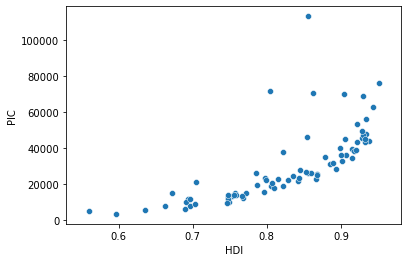

In [105]:
sns.scatterplot(data=hdi_e_pic_energia_df, x="HDI", y="PIC");

Podemos ver uma clara conexão entre os dois. Para terminar, vamos refazer o gráfico acima, no qual as cores representarão o quão verde o país é.

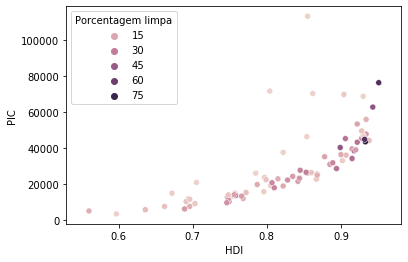

In [99]:
sns.scatterplot(data=hdi_e_pic_energia_df, x="HDI", y="PIC", hue="Porcentagem limpa");

Continuamos com uma conexão, mas dessa vez não tão forte. De acordo com o gráfico, ter uma matriz energética limpa se correlaciona diretamente com o quão desenvolvido o país é, mas o inverso não é verdade. Isso é curioso, pois iríamos supor que se um país tem condições, ele iria optar por tecnologias mais verdes, afinal o futuro do planeta depende disso.



Agora que verificamos a relação entre os indicadores socioeconômicos de um país com o quão limpa sua matriz é, vamos analisar qual a principal tecnologia verde usada por cada um. Com isso, esperamos ver qual a principal fonte renovável sendo usada atualmente.